## Тема “Обучение без учителя”

### Задание 1

- Импортируйте библиотеки pandas, numpy и matplotlib.
- Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
- Создайте датафреймы X и y из этих данных.
- Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
- Масштабируйте данные с помощью StandardScaler.
- Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42.
- Постройте диаграмму рассеяния на этих данных.


####  Импортируйте библиотеки pandas и numpy. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16, 12)

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
%config Completer.use_jedi = False 

In [3]:
import warnings

warnings.filterwarnings('ignore')

In [4]:
pd.options.display.max_columns = 100
RANDOM_STATE=42


In [9]:
boston_dataset = load_boston()

In [11]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [14]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [20]:
X = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names) 

In [21]:
y = boston.target 

In [22]:
X.head() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [39]:
X.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=RANDOM_STATE)

In [25]:
len(X_test) / len(X), len(y_test) / len(y) 

(0.2015810276679842, 0.2015810276679842)

In [26]:
scaler = StandardScaler() 

In [27]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

In [29]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=boston_dataset.feature_names)

In [30]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=boston_dataset.feature_names) 

In [31]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=RANDOM_STATE) 

In [32]:
X_train_tsne = tsne.fit_transform(X_train_scaled) 

In [33]:
X_train_tsne[:2, :] 

array([[28.13809  , 18.375324 ],
       [-9.785578 , -4.5355387]], dtype=float32)

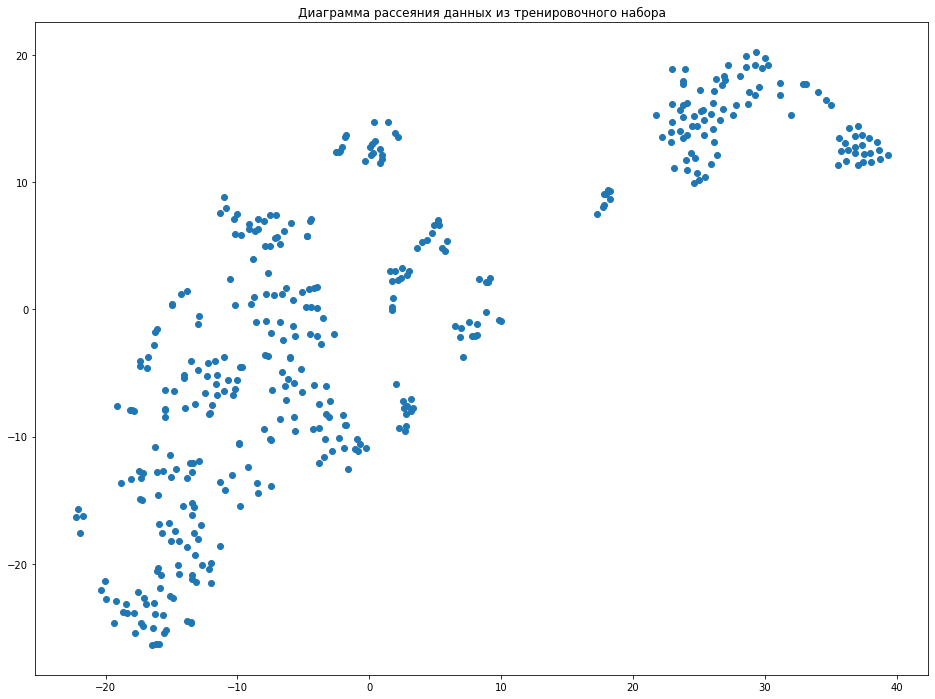

In [34]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.title('График рассеяния данных из тренировочного набора')
plt.show()

### Задание 2

- С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,используйте все признаки из датафрейма X_train.
- Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
- Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,и раскрасьте точки из разных кластеров разными цветами.
- Вычислите средние значения price и CRIM в разных кластерах.


In [40]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=RANDOM_STATE) 

In [41]:
train_labels = kmeans.fit_predict(X_train_scaled) 

In [42]:
pd.value_counts(train_labels) 

0    191
1    127
2     86
dtype: int64

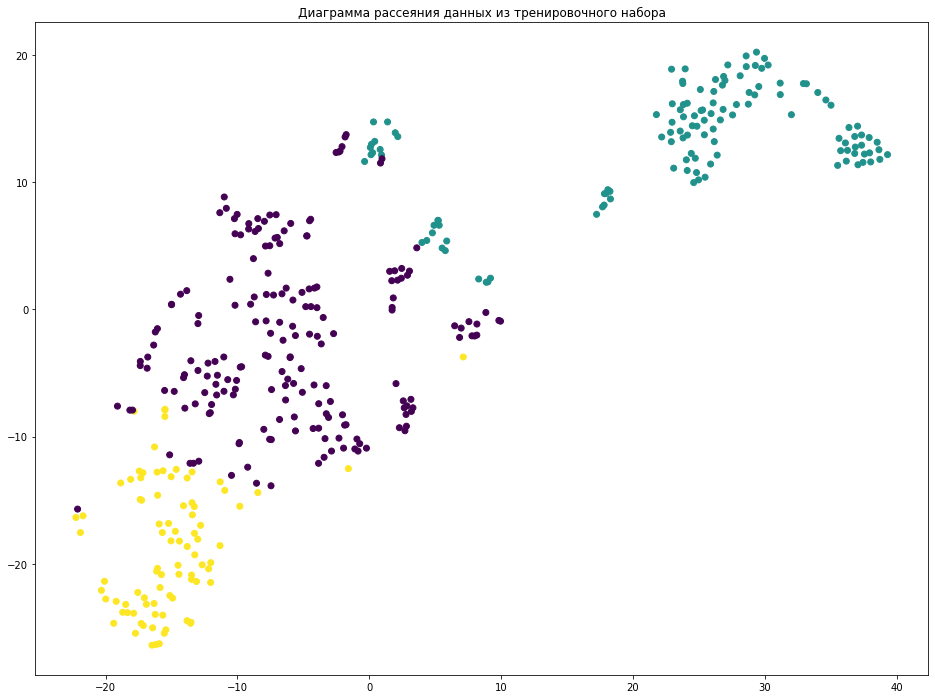

In [44]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels)
plt.title('График рассеяния данных из тренировочного набора')
plt.show()

In [60]:
cl_0 = X_train.loc[train_labels==0, 'CRIM'].mean()
cl_1 = X_train.loc[train_labels==1, 'CRIM'].mean()
cl_2 = X_train.loc[train_labels==2, 'CRIM'].mean()
cl_0_0 = y_train[train_labels==0].mean()
cl_1_1 = y_train[train_labels==1].mean()
cl_2_2 = y_train[train_labels==2].mean()

print(f"Среднее значение фичи CRIM в кластере 0 = {cl_0}")
print(f"Среднее значение фичи CRIM в кластере 1 = {cl_1}")
print(f"Среднее значение фичи CRIM в кластере 2 = {cl_2}")

print(f"Среднее значение фичи price в кластере 0 = {cl_0_0}")
print(f"Среднее значение фичи price в кластере 1 = {cl_1_1}")
print(f"Среднее значение фичи price в кластере 2 = {cl_2_2}")

Среднее значение фичи CRIM в кластере 0 = 0.42166020942408367
Среднее значение фичи CRIM в кластере 1 = 10.797028425196853
Среднее значение фичи CRIM в кластере 2 = 0.07356558139534886
Среднее значение фичи price в кластере 0 = 24.958115183246072
Среднее значение фичи price в кластере 1 = 16.165354330708663
Среднее значение фичи price в кластере 2 = 27.78837209302326


### Задание 3

- Примените модель KMeans, построенную в предыдущем задании,к данным из тестового набора.
- Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.



In [61]:
test_labels = kmeans.predict(X_test_scaled)
pd.value_counts(train_labels) 

0    191
1    127
2     86
dtype: int64

In [62]:
X_test_tsne = tsne.fit_transform(X_test_scaled) 

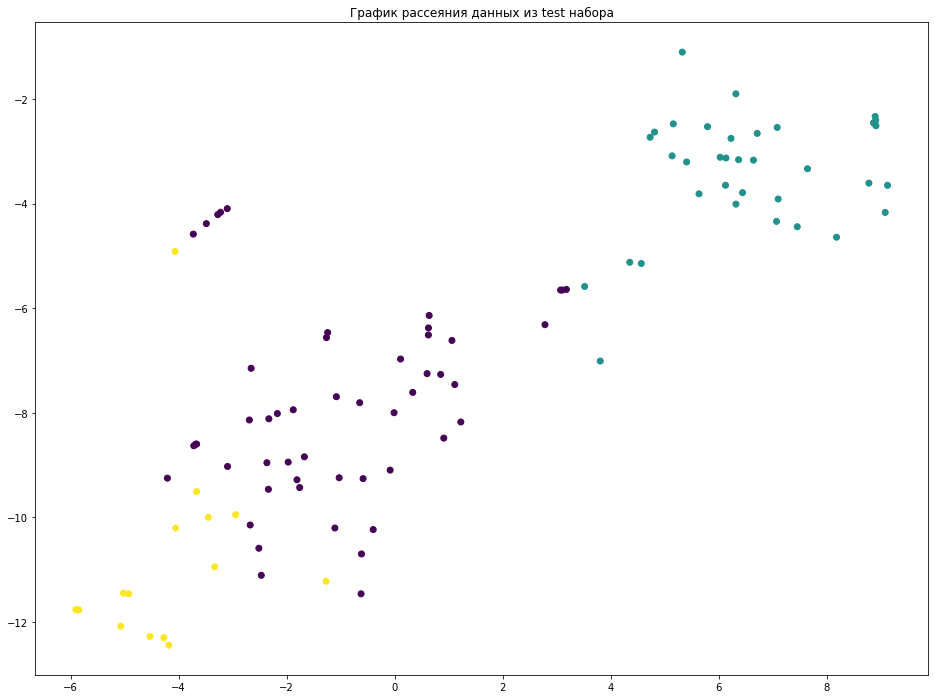

In [65]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=test_labels)
plt.title('График рассеяния данных из test набора')
plt.show()

In [68]:
cl_0_test = X_test.loc[test_labels==0, 'CRIM'].mean()
cl_1_test = X_test.loc[test_labels==1, 'CRIM'].mean()
cl_2_test = X_test.loc[test_labels==2, 'CRIM'].mean()
cl_0_0_test = y_test[test_labels==0].mean()
cl_1_1_test = y_test[test_labels==1].mean()
cl_2_2_test = y_test[test_labels==2].mean()

print(f"Среднее значение фичи CRIM в кластере 0 = {cl_0_test}")
print(f"Среднее значение фичи CRIM в кластере 1 = {cl_1_test}")
print(f"Среднее значение фичи CRIM в кластере 2 = {cl_2_test}")

print(f"Среднее значение фичи price в кластере 0 = {cl_0_0_test}")
print(f"Среднее значение фичи price в кластере 1 = {cl_1_1_test}")
print(f"Среднее значение фичи price в кластере 2 = {cl_2_2_test}")

Среднее значение фичи CRIM в кластере 0 = 0.26607882352941176
Среднее значение фичи CRIM в кластере 1 = 10.165531142857143
Среднее значение фичи CRIM в кластере 2 = 0.062060000000000004
Среднее значение фичи price в кластере 0 = 21.860784313725492
Среднее значение фичи price в кластере 1 = 16.43714285714286
Среднее значение фичи price в кластере 2 = 31.35
